## Python数据分析第08天

### matplotlib概述

1.画布：figure ---> figsize / dpi ---> Figure

2.坐标系：subplot ---> Axes

3.图表：

    - 折线图：plot ---> 趋势

    - 散点图：scatter ---> 关系 ---> 气泡图

    - 柱状图：bar / barh ---> 对比数据

    - 饼图：pie ---> 占比 ---> 环状图 / 树形图

    - 直方图：hist ---> 分布 ---> 概率密度曲线
    
    - 箱线图：boxplot ---> 描述性统计信息和异常值

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [28]:
# 显示所有列
pd.set_option('display.max_columns', None)

In [29]:
#矢量图
%config InlineBackend.figure_format = 'svg'

In [30]:
x = np.linspace(np.pi * -2, np.pi * 2, 120) # 生成120个点
y1 = np.sin(x) # 计算每个点的正弦值
y2 = np.cos(x) # 计算每个点的余弦值

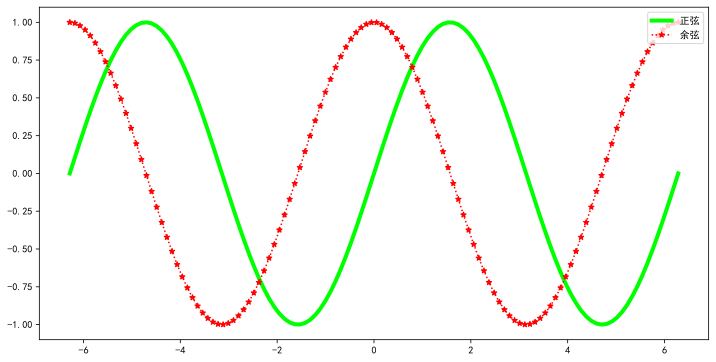

In [31]:
plt.figure(figsize=(12, 6), dpi=120) # 创建一个图像窗口，大小为8*4英寸,分辨率为120
plt.plot(x, y1, color='#00ff00', linewidth=4, label='正弦') # 绘制正弦曲线,颜色为绿色,线宽为4
plt.plot(x, y2, color='#ff0000', linestyle=':', marker='*', label='余弦') # 绘制余弦曲线,颜色为红色,线型为虚线,标记为星号
plt.legend(loc='upper right') # 显示图例,位置在右上角
plt.show()

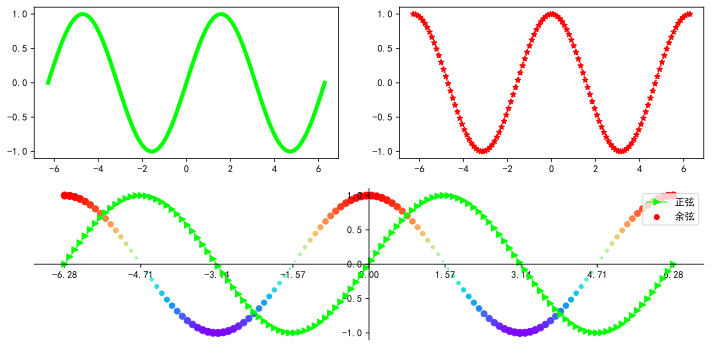

In [32]:
plt.figure(figsize=(12, 6), dpi=120) # 创建一个图像窗口，大小为8*4英寸,分辨率为120

plt.subplot(2, 2, 1) # 将画布分割成2行1列,图像画在从左到右从上到下的第1块
plt.plot(x, y1, color='#00ff00', linewidth=4, label='正弦') # 绘制正弦曲线,颜色为绿色,线宽为4

plt.subplot(2, 2, 2) # 将画布分割成2行2列,图像画在从左到右从上到下的第2块
plt.plot(x, y2, color='#ff0000', linestyle=':', marker='*', label='余弦') # 绘制余弦曲线,颜色为红色,线型为虚线,标记为星号

# 定制坐标系的边框
ax = plt.subplot(2, 1, 2)
ax.spines['top'].set_visible(False) # 隐藏上边框
ax.spines['right'].set_visible(False) # 隐藏右边框
ax.spines['left'].set_position('center') # 将左边框移动到y=0的位置
ax.spines['bottom'].set_position('center') # 将下边框移动到x=0的位置
# 定制横轴纵轴的刻度
plt.yticks(np.arange(-1, 1.5, 0.5)) # 设置y轴刻度为-1, -0.5, 0, 0.5, 1, 1.5
plt.xticks(np.arange(-np.pi * 2, np.pi * 2.5, np.pi / 2),
          ) # 设置x轴刻度为-pi*2, -pi*1.5, -pi, -pi*0.5, 0, pi*0.5, pi, pi*1.5, pi*2, pi*2.5
# plt.text(0, 0 ,'hello',fontdict={'size': 16, 'color': 'red'}) # 在坐标(0, 0)处添加文本,字体大小为16,颜色为红色
plt.plot(x, y1, color='#00ff00', linewidth=1, marker='>', label='正弦') # 绘制正弦曲线,颜色为绿色,线宽为1,标记为三角形
plt.scatter(x, y2, c=y2, s=np.abs(y2) * 50, cmap='rainbow', label='余弦') # 绘制散点图,颜色为y2的值,大小为y2的绝对值*50,颜色映射为rainbow
plt.legend(loc='upper right') # 显示图例,位置在右上角
plt.show()

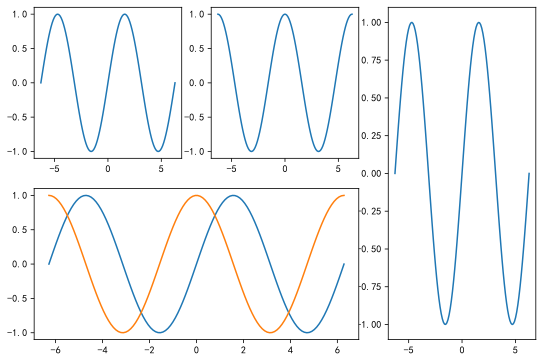

In [69]:
fig = plt.figure(figsize=(9, 6), dpi=120)
grid = plt.GridSpec(2, 3) # 将画布分割成2行3列
fig.add_subplot(grid[0])
plt.plot(x, y1)
fig.add_subplot(grid[1])
plt.plot(x, y2)
fig.add_subplot(grid[:, 2])
plt.plot(x, y1)
fig.add_subplot(grid[1, :2])
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()


**柱状图**

In [33]:
data1 = np.random.randint(100, 500, 4)
data2 = np.random.randint(200, 400, 4)
data3 = np.random.randint(300, 600, 4)
quarter = np.arange(4)

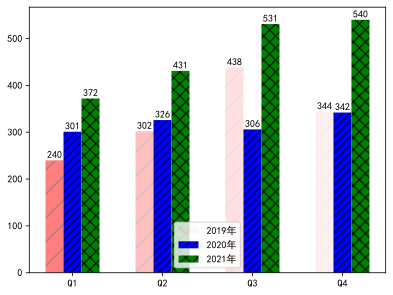

In [75]:
plt.bar(quarter - 0.2, data1, width=0.2, alpha=0.5, hatch='/', label='2019年', color='red') 
plt.bar(quarter , data2, width=0.2, hatch='///', label='2020年', color='blue') 
plt.bar(quarter + 0.2, data3, width=0.2, hatch='xx', label='2021年', color='green') 
plt.xticks(quarter, labels=['Q1', 'Q2', 'Q3', 'Q4']) # 设置x轴刻度为Q1, Q2, Q3, Q4
plt.legend(loc='lower center') 
for i in range(4):
    plt.text(i - 0.2, data1[i] + 5, data1[i], ha='center', ) # 在柱状图上方添加数据标签,ha参数控制水平对齐方式,va参数控制垂直对齐方式
    plt.text(i, data2[i] + 5, data2[i], ha='center', )
    plt.text(i + 0.2, data3[i] + 5, data3[i], ha='center', )
plt.show()

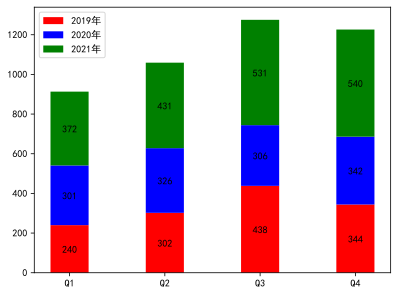

In [35]:
plt.bar(quarter, data1, width=0.4, label='2019年', color='red') # 绘制柱状图,宽度为0.4,图例为2019年
plt.bar(quarter, data2, bottom=data1, width=0.4, label='2020年', color='blue') # 绘制柱状图,宽度为0.4,图例为2020年
plt.bar(quarter, data3, bottom=data1 + data2, width=0.4, label='2021年', color='green') # 绘制柱状图,宽度为0.4,图例为2021年
plt.xticks(quarter, labels=['Q1', 'Q2', 'Q3', 'Q4']) # 设置x轴刻度为Q1, Q2, Q3, Q4
plt.legend() # 显示图例
for i in range(4):
    plt.text(i, data1[i] // 2 - 20, data1[i], ha='center') # 在柱状图上方添加数据标签,ha参数控制水平对齐方式,va参数控制垂直对齐方式
    plt.text(i, data2[i] // 2 - 20 + data1[i], data2[i], ha='center')
    plt.text(i, data3[i] // 2 - 20 + data1[i] + data2[i], data3[i], ha='center')
plt.show()

**饼图**

In [36]:
labels = ['香蕉', '苹果', '橘子', '西瓜', '葡萄', '梨子', '桃子']
data = np.random.randint(100, 500, 7)
data

array([113, 251, 464, 382, 478, 406, 468])

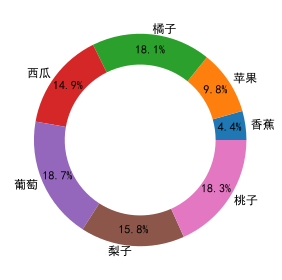

In [37]:
# plt.figure(figsize=(8, 8))
plt.pie(
    data,
    labels=labels, labeldistance=1.05,
    autopct='%.1f%%', pctdistance=0.85, 
    # explode=[0.1, 0, 0, 0, 0, 0, 0], # 突出显示香蕉
    # shadow=True, # 添加阴影
    wedgeprops={'width': 0.29}, # 设置饼图的宽度
    textprops={'fontsize': 12, 'color': 'black'}, # 设置文本标签的字体大小和颜色
)
plt.show()

In [39]:
# 导入百度股票数据
import tushare as ts
df = ts.get_k_data('600000', start='2022-01-01', end='2022-06-18')
df


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


c:\Python311\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


,date,open,close,high,low,volume,code
0,2022-01-04,8.13,8.16,8.17,8.11,377076.0,600000
1,2022-01-05,8.16,8.23,8.27,8.15,554591.0,600000
2,2022-01-06,8.25,8.16,8.25,8.15,410311.0,600000
3,2022-01-07,8.16,8.30,8.32,8.16,630183.0,600000
4,2022-01-10,8.31,8.31,8.37,8.25,340553.0,600000
...,...,...,...,...,...,...,...
103,2022-06-13,7.50,7.36,7.52,7.33,1045972.0,600000
104,2022-06-14,7.33,7.46,7.48,7.32,550478.0,600000
105,2022-06-15,7.45,7.62,7.72,7.44,1127591.0,600000
106,2022-06-16,7.64,7.51,7.67,7.51,568897.0,600000


In [46]:
# 把所有数据转换为python的list，并组合到一起
date = df['date'].tolist()
open = df['open'].tolist()
close = df['close'].tolist()
high = df['high'].tolist()
low = df['low'].tolist()
#组合数据
data = [list(z) for z in zip(open, close, high, low)]

In [77]:
from pyecharts import options as opts
from pyecharts.charts import Kline


baidu_data = Kline()
# 设置x轴的数据，为日期，从2022年1月1日到2022年6月18日
baidu_data.add_xaxis(date)
baidu_data.add_yaxis("kline", data)
baidu_data.set_global_opts(
    xaxis_opts=opts.AxisOpts(is_scale=True), # 设置x轴为数值轴
    yaxis_opts=opts.AxisOpts(
        is_scale=True, 
        splitarea_opts=opts.SplitAreaOpts( 
            is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1) # 设置y轴的网格区域为显示状态,并设置透明度为1
        ),
    ),
    datazoom_opts=[opts.DataZoomOpts(pos_bottom="-2%")], # 设置datazoom组件的位置
    title_opts=opts.TitleOpts(title="Kline-DataZoom-slider-Position"), # 设置标题
)
# toolboxOpts设置工具栏
baidu_data.set_global_opts(toolbox_opts=opts.ToolboxOpts(is_show=True))

baidu_data.set_series_opts( 
    markpoint_opts=opts.MarkPointOpts( 
        data=[
            opts.MarkPointItem(type_="max", name="最大值"), 
            opts.MarkPointItem(type_="min", name="最小值"), 
        ]
    )
) 
# 图表显示在notebook中
baidu_data.render_notebook()
# baidu_data.render("kline_datazoom_slider_position.html")

